[![DOI](https://zenodo.org/badge/940091341.svg)](https://doi.org/10.5281/zenodo.14939868) <a href="https://www.globh2e.org.au/"><img src="https://img.shields.io/badge/ARC:Funding%20number-IC200100023-blue.svg"/></a>

# **Pathways to global hydrogen production within planetary boundaries**
**<div style="text-align: left; font-size: 19px;"> Total human impact on planetary boundaries**</div>

<div style="text-align: left; font-size: 16px;">Michaël Lejeune<sup>a,b</sup>, Sami Kara<sup>a,b</sup>, Michael Zwicky Hauschild<sup>c,d</sup>, Sareh Sharabifarahni<sup>a</sup>, Rahman Daiyan<sup>b,e</sup></div><br>

<div style="text-align: left; font-size: 13px;"><sup>a</sup>Sustainability in Manufacturing and Life Cycle Engineering Research Group, School of Mechanical and Manufacturing Engineering, the University of New South Wales, 2052, Sydney, Australia</div>

<div style="text-align: left; font-size: 13px;">
<sup>b</sup>Australian Research Council Training Centre for the Global Hydrogen Economy (GlobH2e), the University of New South Wales, 2052, Sydney, Australia</div>

<div style="text-align: left; font-size: 13px;">
<sup>c</sup>Centre for Absolute Sustainability, Technical University of Denmark, Kgs, Lyngby, Denmark</div>

<div style="text-align: left; font-size: 13px;">
<sup>d</sup>Division for Quantitative Sustainability Assessment (QSA), Department of Environmental and Resource Engineering, Technical University of Denmark, Kgs, Lyngby, Denmark</div>

<div style="text-align: left; font-size: 13px;">
<sup>e</sup>School of Minerals and Energy Engineering, The University of New South Wales, Sydney 2052, Australia</div><br>

<div style="text-align: left; font-size: 13px;"> Code developer and maintainer:<a href="mailto:m.lejeune@unsw.edu.au"> Michaël Lejeune</div></a><br>

# **0. Initialisation**

In [1]:
using LinearAlgebra, Statistics
using JLD2
include("Utils/1_00_utils.jl")
;


Setting rcParams


<div style="background-color:rgb(204, 237, 255); padding: 10px; border-radius: 5px;">
    <p style="color:rgb(0, 133, 204); font-weight: bold;">
        Note on mathematical array notations and format</p>
<p style="color:rgb(0, 133, 204); font-weight: bold;">

For Matrices, we use bold capital letters, e.g. $\boldsymbol{A}$, and for vectors, we use bold lowercase letters, e.g. $\boldsymbol{a}$. 

The elements of a matrix are denoted by $A_{ij}$, where $i$ is the row index and $j$ is the column index. For vectors, the elements are denoted by $a_i$, where $i$ is the index of the vector element.

Note that all coefficients (i.e., $A_{ij}$ and $a_i$) are normalised to assess boundaries and interactions on the same scale. </p></div>

# **1. Introduction** 

According to Lade et al.[1], the total human impact $\boldsymbol{h}$ on the Earth system is composed of several kind of interactions, namely:

- **Biophysical interactions**: naturally occuring interactions betweent the different Earth biophysical systems

- **Human-mediated interactions**: interactions induced by human activities - Response of human behaviour to a change in the state of a biophysical system

- **Parallel parallel human impacts**: Resulting impact on other biophysical systems due to a change in the state of a biophysical system

Mathematically, this can be expressed as:

$$
\boldsymbol{d+Rx+P(d+Rx)=h} \tag{1}
$$

$$
\boldsymbol{\left(I-B\right)x = \Gamma_B x =h} \tag{2}
$$

Using equation (1) and (2), we can derive the equation (3) to isolate the state of control variables $\boldsymbol{x}$

$$
\boldsymbol{d+Rx+P\left(d+Rx\right)=\left(I-B\right)x} \tag{3}
$$

Now we solve for $\boldsymbol{x}$, the state of control variables which gives equation (4):

$$
\boldsymbol{\left[ I-(B+R+PR) \right]^{-1} \left( I+P\right)d = \Gamma_H d =x} \tag{4}
$$

Where in equation (4) we have defined $\boldsymbol{\Gamma_H}$ = $\boldsymbol{\left[ I-(B+R+PR) \right]^{-1} \left( I+P\right)}$ as the matrix capturing the full range of interactions based on direct human impact $\boldsymbol{d}$

Now assuming that the human-mediated interactions $\boldsymbol{R}$ and the parallel human impacts $\boldsymbol{P}$ are zero, we can express the state of control variables $\boldsymbol{x}$ as:

$$
\boldsymbol{\left( I-B\right)^{-1}d = \Gamma_B d =x} \tag{5}
$$

in equation (4), $\boldsymbol{\Gamma_B}$ = $\boldsymbol{\left( I-B\right)^{-1}}$ the matrix capturing the biophysical interactions. Lastly, if the biophysical interactions $\boldsymbol{B}$ are also zero, we can express the state of control variables $\boldsymbol{x}$ as:

$$
\boldsymbol{d =x} \tag{6}
$$

To illustrate the entire model, Figure 1 shows the interactions assummed in this work. For the analysis in [section 3](#3-analysis) we will assess the how the state of the control variables $\boldsymbol{x}$ is influenced by direct human impact under 3 scenarions:
- **N-PBI**: No interactions -> Equation (6)
- **B-PBI**: Biophysical interactions -> Equation (5)
- **H-PBI**: Human-mediated and parallel human impacts -> Equation (4)


<div style="text-align:center;">
    <figure>
        <img src="../figures/PBI/control_PB.svg" width="750">
        <figcaption>
        Figure 1: Total human impact based on the control theory.
        </figcaption>
    </figure>
</div
>


# **2. Interaction matrices**

Given  equations (1) to (4), we can define the interaction matrices $\boldsymbol{B}$, $\boldsymbol{R}$ and $\boldsymbol{P}$ directly from Lade et al.[1].

In [2]:
𝐈=I(10) # Identity matrix

# 𝐁 matrix for Biophysical interactions
𝐁 = [
    1.0     0.15    0.38    0.22    0.10    0.19    -0.07   -0.08   0       -0.06   # Climate Change
    0.22    1       0       0       0       0       0.08    0       0       0       # BI Land
    0.17    0       1       0       0       0       0.04    0       0       0       # BI Freshwater
    0.15    0       0       1       0       0       0.06    0       0       0       # BI Ocean
    0.12    0.8     0.08    0       1       0       0.16    -0.11   0       0       # Land System Change
    0.04    0.02    1       0.05    0       1       -0.03   0       0.10    0.01    # Biogeochemical Flows
    0.10    0       0       1       0       0       1       0       0       0       # Ocean Acidification
    0       0       1       0       0       0       0       1       0       0       # Freshwater Use
    -0.56   0       0       0       0       0       0       0       1       0       # Aerosol Loading
    -0.11   0       0       0       0       0       0       0       0       1       # Strat. Ozone Deplet.
    ]'-𝐈

    
# 𝐑 matrix for Reactive human-mediated interactions
𝐑 = [
    1       0       0       0       0.05        0       0       0       0       0       # Climate Change
    0       1       0       0       0           0       0       0       0       0       # BI Land
    0.002   0       1       0       0.003       0       0       0       0       0       # BI Freshwater
    0       0       0       1       0.02        0       0       0       0       0       # BI Ocean
    0       0       0       0       1           0       0       0       0       0       # Land System Change
    0       0       0       0       0           1       0       0       0       0       # Biogeochemical Flows
    0       0       0       0       0           0       1       0       0       0       # Ocean Acidification
    0       0       0       0       0           0       0       1       0       0       # Freshwater Use
    0       0       0       0       0           0       0       0       1       0       # Aerosol Loading
    0       0       0       0       0           0       0       0       0       1       # Strat. Ozone Deplet.
    ]'-𝐈

# Define 𝐏 matrix for Parallel human drivers
𝐏 = [
    1       0       0       0       0       0       0.40        0.065       0       0       # Climate Change
    0       1       0       0       0       0       0           0           0       0       # BI Land
    0       0       1       0       0       0       0           0           0       0       # BI Freshwater
    0       0       0       1       0       0       0           0           0       0       # BI Ocean
    0.33    0       0       0       1       1.3     0           0.36        0       0       # Land System Change
    0.005   0       0       0       0       1       0           0           0       0       # Biogeochemical Flows
    0       0       0       0       0       0       1           0           0       0       # Ocean Acidification
    0.018   0       0       0       0       0       0           1           0       0       # Freshwater Use
    0       0       0       0       0       0       0           0           1       0       # Aerosol Loading
    0.52    0       0       0       0       0       0           0           0       1       # Strat. Ozone Deplet.
    ]'-𝐈
;


For now, we will defined the interaction matrices for biophysical interactions $\boldsymbol{𝚪ᵦ}°$ and the full range of interactions $\boldsymbol{𝚪ᵦ}°$ with a temporary supscript $°$. The rational behind this is that we need to format these matrices to match the dimensions of the study

In [3]:
𝚪ᵦ°=(𝐈-𝐁)^-1
𝚪ₕ°=(𝐈-(𝐁+𝐑+𝐏*𝐑))^-1*(𝐈+𝐏);


the issue with these matrices is that they are not having the dimensions required to be compatible with the direct human impact $\boldsymbol{d}$, that is obtained from the absolute environmental sustainability assessment (AESA). To solve this issue, we created a function `matformat` available in the [utility file](Utils/1_00_utils.jl) of this notebook. 

Once the matrices are defined, we can compute the human impact matrix $\boldsymbol{\Gamma_H}$ and the biophysical interaction matrix $\boldsymbol{\Gamma_B}$. Note that the int the code below $\boldsymbol{\Gamma_B = \Gamma_\beta}$.

In [4]:
𝚪ᵦ = matformat(𝚪ᵦ°)
𝚪ₕ = matformat(𝚪ₕ°);


Now we can visualise how some biophysical systems interact with each other. In the results figure below, biophysical systems on the rows axis, are receiving the impact while the columns create the impact. Negative values can be interpreted as a stabilisation potential while positive values as amplification potential.

## **2.1 Visualising the interactions**

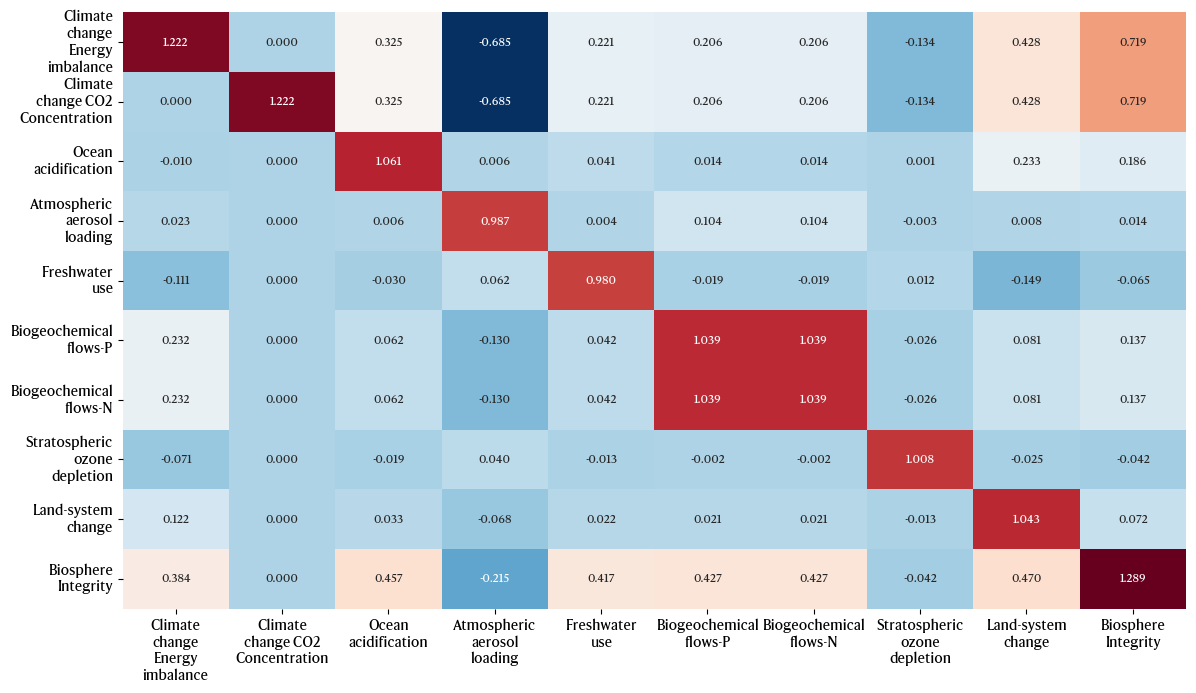

In [5]:
fig, ax = plt.subplots(figsize=(12,7))
kw_ag_font=Dict("fontproperties"=>font_prop, "fontsize"=> 8)
cbar_kw=Dict("label"=> "%")
Seaborn.heatmap(𝚪ᵦ,ax=ax,cbar=false,annot=true,annot_kws=kw_ag_font, fmt=".03f",cbar_kws=cbar_kw,cmap="RdBu_r")
ax.set_xticklabels(catnames,rotation=0, ha="center",fontproperties=font_prop_labels,fontsize=10)
ax.set_yticklabels(catnames,rotation=0,fontproperties=font_prop,fontsize=10)
fig.tight_layout()
plt.savefig(respath*"SI_Fig5_H_PBI_interaction_matrix.svg",bbox_inches="tight",transparent=true)
plt.savefig(respath*"SI_Fig5_H_PBI_interaction_matrix.png",dpi=800,bbox_inches="tight",transparent=true)
display(plt.gcf())
plt.close("all")


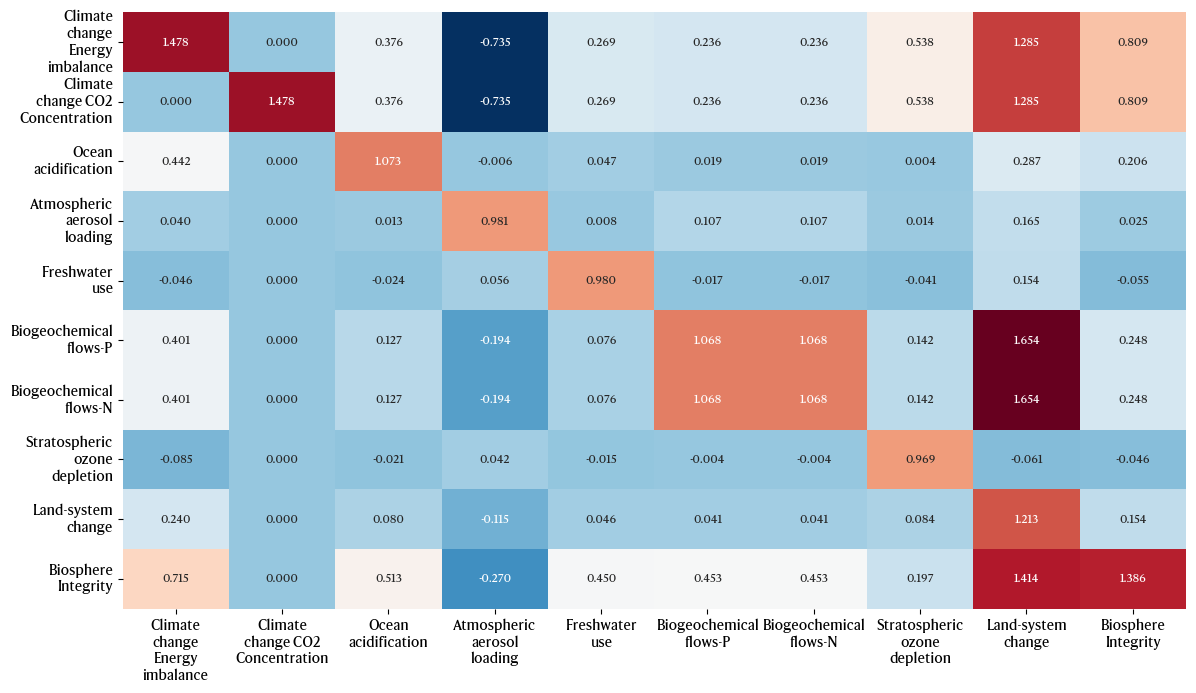

In [6]:
fig, ax = plt.subplots(figsize=(12,7))#figsize=(12,7)
kw_ag_font=Dict("fontproperties"=>font_prop, "fontsize"=> 8)
cbar_kw=Dict("label"=> "%")
Seaborn.heatmap(𝚪ₕ,ax=ax,cbar=false,annot=true,annot_kws=kw_ag_font, fmt=".03f",cbar_kws=cbar_kw,cmap="RdBu_r")
ax.set_xticklabels(catnames,rotation=0, ha="center",fontproperties=font_prop,fontsize=10)
ax.set_yticklabels(catnames,rotation=0,fontproperties=font_prop,fontsize=10)
fig.tight_layout()
plt.savefig(respath*"SI_Fig6_H_PBI_interaction_matrix.svg",bbox_inches="tight",transparent=true)
plt.savefig(respath*"SI_Fig6_H_PBI_interaction_matrix.png",dpi=800,bbox_inches="tight",transparent=true)
display(plt.gcf())
plt.close("all")


We can now also visualise the flows between the biophysical systems as in Lade et al.[1]. We simply need to remove the extra dimensions we have added. 

In [7]:
adjacency_matrix = matformat(𝐁)'
adjacency_matrix=remove_index(adjacency_matrix, 2) #removes CO2 concentration
adjacency_matrix=remove_index(adjacency_matrix, 5) #removes one of the biochemical flows
adjacency_matrix=round.(adjacency_matrix, digits=2)


8×8 Matrix{Float64}:
  0.0   -0.07  0.0  -0.08  0.19  -0.06  0.1  0.25
  0.1    0.0   0.0   0.0   0.0    0.0   0.0  0.33
 -0.56   0.0   0.0   0.0   0.0    0.0   0.0  0.0
  0.0    0.0   0.0   0.0   0.0    0.0   0.0  0.33
  0.04  -0.03  0.1   0.0   0.0    0.01  0.0  0.36
 -0.11   0.0   0.0   0.0   0.0    0.0   0.0  0.0
  0.12   0.16  0.0  -0.11  0.0    0.0   0.0  0.29
  0.54   0.18  0.0   0.0   0.0    0.0   0.0  0.0

we can now also get the sum of originating magnitudes as in Lade et al.[1].

In [8]:
sum(abs.(adjacency_matrix),dims =2)'


1×8 adjoint(::Matrix{Float64}) with eltype Float64:
 0.75  0.43  0.56  0.33  0.54  0.11  0.68  0.72

Same is done for receiving magnitudes. 


In [9]:
sum(abs.(adjacency_matrix),dims =1) #sum of each column


1×8 Matrix{Float64}:
 1.47  0.44  0.1  0.19  0.19  0.07  0.1  1.56

These values are identical to those in Lade et al.†


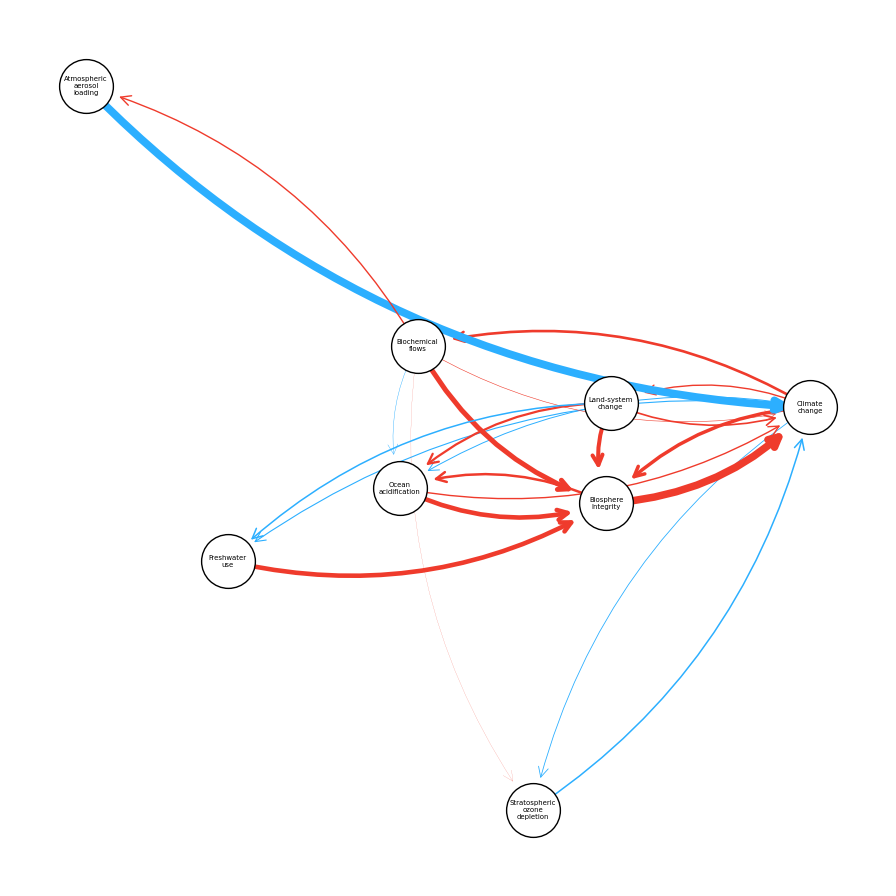

In [10]:
force_interactions(adjacency_matrix)


# **3. Analysis**

## **3.1 N-PBI: No interactions**

Now, in the hypothetical case that human activities are within their dedicated space without interactions, we can evaluate how much the impacts would be amplified or stabilised.

Applying equation (6) for the N-PBI scenario, using a direct human impact $\boldsymbol{d}$ vector of ones, which hypothetically assumes that the human impact is within the safe operating space, we can compute the state of control variables $\boldsymbol{x}$ when no interactions are involved. 

In [11]:
𝐱=𝐝=ones(10)
print_state(𝐱)


10-element Vector{Pair{String, Float64}}:
  "Climate change Energy imbalance" => 1.0
 "Climate change CO2 Concentration" => 1.0
              "Ocean acidification" => 1.0
      "Atmospheric aerosol loading" => 1.0
                   "Freshwater use" => 1.0
           "Biogeochemical flows-P" => 1.0
           "Biogeochemical flows-N" => 1.0
    "Stratospheric ozone depletion" => 1.0
               "Land-system change" => 1.0
              "Biosphere Integrity" => 1.0

From there, it can easily be seen that there is no amplification or stabilisation of the human impact, what comes in is what comes out, as expected.

## **3.2 B-PBI: Biophysical interactions**

 Now, we can apply equation (5) for the B-PBI scenario, using, again, the same direct human impact $\boldsymbol{d}$ vector of ones, we can compute the state of control variables $\boldsymbol{x}$ when naturally occuring biophysical interactions are involved.

The results are now quite different, we can see that some values are amplified while others are stabilised. We can evaluate this more clearly by substracting the "sustainable" state of control variables $\boldsymbol{x}$ in the N-PBI scenario from that of the B-PBI scenario. This will give us an indication of how much the space has been amplified or stabilised by the biophysical interactions. 

In [12]:
𝐱ᵦ = 𝚪ᵦ * 𝐝
print_state(𝐱ᵦ)


10-element Vector{Pair{String, Float64}}:
  "Climate change Energy imbalance" => 2.508366270918018
 "Climate change CO2 Concentration" => 2.508366270918018
              "Ocean acidification" => 1.545287441346244
      "Atmospheric aerosol loading" => 1.2476589591474425
                   "Freshwater use" => 0.6617386693464604
           "Biogeochemical flows-P" => 2.4765895914744234
           "Biogeochemical flows-N" => 2.4765895914744234
    "Stratospheric ozone depletion" => 0.8742639196596632
               "Land-system change" => 1.250836627091802
              "Biosphere Integrity" => 3.6129959695332126

Can this be different? let us now assume a direct human impact with significantly reduced impact on biospehre integrity, for this we assume that $\boldsymbol{d_{BI}}=0.2$ meaning that the human impact on biosphere integrity is 20% of the safe operating space. In the dimensions of this work, it has the index 10.

In [13]:
𝐝[10]=0.2
𝐱ᵦ° = 𝚪ᵦ * 𝐝
Δ𝐱= 𝐱ᵦ°-𝐱ᵦ
print_state(Δ𝐱)


10-element Vector{Pair{String, Float64}}:
  "Climate change Energy imbalance" => -0.5748954367310588
 "Climate change CO2 Concentration" => -0.5748954367310588
              "Ocean acidification" => -0.148454106326682
      "Atmospheric aerosol loading" => -0.010923013297890138
                   "Freshwater use" => 0.05231548474252645
           "Biogeochemical flows-P" => -0.10923013297890138
           "Biogeochemical flows-N" => -0.10923013297890138
    "Stratospheric ozone depletion" => 0.03340142487407449
               "Land-system change" => -0.05748954367310599
              "Biosphere Integrity" => -1.031592413284069

We can clearly see that now, in several cases, reducing the overall impact on biosphere integrity has stabilised the impact on climate change. However, the impact on biopsphere integrity, due to interactions remains quite high. Let's build a function to investigate how, for instance land use change, and biosphere integrity can be "used" to reduce impact on climate change.

In [14]:
function 𝐱₁(𝐝₉,𝐝₁₀)
    𝐝 = ones(10)
    𝐝[9] = 𝐝₉
    𝐝[10] = 𝐝₁₀
    return (𝚪ᵦ * 𝐝)[1]
end


𝐱₁ (generic function with 1 method)

Once the function is defined, we can simply broadcast it to see the influence. The system is pretty linear so there will surely be a linear relationship between the impact on biosphere integrity and the impact on climate change.

In [15]:
𝐱cc=[𝐱₁(l,b) for l in 0.001:0.001:1, b in 0.001:0.001:1];


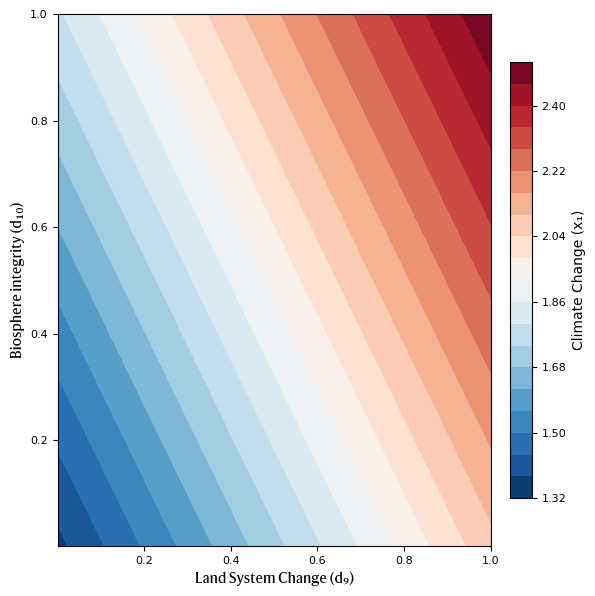

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))
cs=ax.contourf(0.001:0.001:1, 0.001:0.001:1, 𝐱cc, levels=20, cmap="RdBu_r")
plt.colorbar(cs,label="Climate Change (x₁)", ax=ax, orientation="vertical", fraction=0.046, pad=0.04)
cs_lines=ax.contour(0.001:0.001:1, 0.001:0.001:1, 𝐱cc, levels=[1], colors="black", linewidths=1)
ax.set_xlabel("Land System Change (d₉)", fontproperties=font_prop_labels, fontsize=10)
ax.set_ylabel("Biosphere integrity (d₁₀)", fontproperties=font_prop_labels, fontsize=10)
ax.grid(false)
plt.tight_layout()
plt.savefig(respath*"SI_Fig_CC_sensitivity_LSCvsBI.svg", bbox_inches="tight", transparent=true)
plt.savefig(respath*"SI_Fig_CC_sensitivity_LSCvsBI.png", dpi=800, bbox_inches="tight", transparent=true)
display(plt.gcf())
plt.close("all")


What we can see is that there is indeed a way to lower the impact on climate change by reducing the impact on biosphere integrity.

## **3.3 H-PBI: Human-mediated and parallel human impacts**

Now let's do the same but for human-mediated interactions in the H-PBI scenario using equation (4).

In [17]:
𝐝=ones(10)
𝐱ₕ=𝚪ₕ*𝐝
print_state(𝐱ₕ)


10-element Vector{Pair{String, Float64}}:
  "Climate change Energy imbalance" => 4.492932152940801
 "Climate change CO2 Concentration" => 4.492932152940801
              "Ocean acidification" => 2.091572317180784
      "Atmospheric aerosol loading" => 1.459063097472016
                   "Freshwater use" => 0.9912727765628893
           "Biogeochemical flows-P" => 4.590630974720154
           "Biogeochemical flows-N" => 4.590630974720154
    "Stratospheric ozone depletion" => 0.7763303805707535
               "Land-system change" => 1.7854269581105437
              "Biosphere Integrity" => 5.3118983581790395

Let us evaluate how human-mediated interactions can amplify even more the interactions between the biophysical systems. 

In [18]:
Δ𝐱ᵢ = 𝐱ₕ-𝐱ᵦ
print_state(Δ𝐱ᵢ)


10-element Vector{Pair{String, Float64}}:
  "Climate change Energy imbalance" => 1.9845658820227832
 "Climate change CO2 Concentration" => 1.9845658820227832
              "Ocean acidification" => 0.54628487583454
      "Atmospheric aerosol loading" => 0.2114041383245735
                   "Freshwater use" => 0.32953410721642884
           "Biogeochemical flows-P" => 2.114041383245731
           "Biogeochemical flows-N" => 2.114041383245731
    "Stratospheric ozone depletion" => -0.09793353908890967
               "Land-system change" => 0.5345903310187416
              "Biosphere Integrity" => 1.698902388645827

As can be seen, there is quite a change and not in a positive way. The human-mediated interactions generally amplify the interactions between the biophysical systems. Hence it is crucuial to consider these types of itneractions. 

# **4. Conclusion**

In conclusion, we have shown that the human impact on the Earth system can be expressed as a function of the direct human impact and the interactions between the biophysical systems. We have also shown that these interactions can amplify or stabilise the human impact on the Earth system.

In [19]:
@save respath*"data_interaction_matrices.jld2" 𝚪ᵦ 𝚪ₕ


# **References**

1. Lade, S.J. et al. (2020) ‘Human impacts on planetary boundaries amplified by Earth system interactions’, 3(2), pp. 119–128. Available at: https://doi.org/10.1038/s41893-019-0454-4.
